In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ai-impact-on-jobs-2030/AI_Impact_on_Jobs_2030.csv


In [2]:
path = '/kaggle/input/ai-impact-on-jobs-2030/AI_Impact_on_Jobs_2030.csv'

df = pd.read_csv(path)

df.index = df.index + 1

## Data Cleaning and preprocessing

In [3]:
df

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
1,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
2,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
3,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
4,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
5,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,Doctor,111319,6,Bachelor's,0.24,1.18,0.20,Low,0.73,0.37,0.99,0.07,0.08,0.92,0.65,0.33,0.76,0.45
2997,UX Researcher,44363,29,PhD,0.65,0.74,0.35,Medium,0.23,0.48,0.05,0.88,0.56,0.29,0.69,0.80,0.61,0.20
2998,Data Scientist,61325,23,Master's,0.64,0.94,0.39,Medium,0.28,0.62,0.73,0.21,0.96,0.01,0.70,0.29,0.48,0.57
2999,Graphic Designer,110296,7,PhD,0.95,1.23,0.46,Medium,0.21,0.18,0.14,0.22,0.55,0.68,0.31,0.55,0.34,0.70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 1 to 3000
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

### There are no missing values.

In [5]:
# Lowering the column names
df.columns = df.columns.str.lower()

In [6]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(f"{i}:\n {df[i].unique()}\n")

job_title:
 ['Security Guard' 'Research Scientist' 'Construction Worker'
 'Software Engineer' 'Financial Analyst' 'AI Engineer' 'Mechanic'
 'Teacher' 'HR Specialist' 'Customer Support' 'UX Researcher' 'Lawyer'
 'Data Scientist' 'Graphic Designer' 'Retail Worker' 'Doctor'
 'Truck Driver' 'Chef' 'Nurse' 'Marketing Manager']

education_level:
 ["Master's" 'PhD' 'High School' "Bachelor's"]

risk_category:
 ['High' 'Low' 'Medium']



In [7]:
def dtype_to_category(df, column_name, categories=None, ordered=False):
    """
    Converts a column in a DataFrame to categorical dtype.
    
    Parameters:
    - df: pandas DataFrame
    - column_name: str, name of the column to convert
    - categories: list, optional, specify the order of categories
    - ordered: bool, whether the categorical should be ordered
    
    Returns:
    - df: pandas DataFrame with updated column type
    """
    df[column_name] = pd.Categorical(df[column_name],
                                     categories=categories,
                                     ordered=ordered)
    return df


# Define the order for education levels if needed
education_order = ['High School', "Bachelor's", "Master's", 'PhD']
risk_order = ['Low', 'Medium', 'High']

# Convert columns
df = dtype_to_category(df, 'education_level', categories=education_order, ordered=True)
df = dtype_to_category(df, 'risk_category', categories=risk_order, ordered=True) 

# The above has been done using a function. Shorter way could have been to convert it without using the function. Defined a function for educational purposes.

df['job_title'] = pd.Categorical(df['job_title'])                                

In [8]:
print(df['education_level'].cat.categories)
print(df['risk_category'].cat.categories)
print(df['job_title'].cat.categories)

Index(['High School', 'Bachelor's', 'Master's', 'PhD'], dtype='object')
Index(['Low', 'Medium', 'High'], dtype='object')
Index(['AI Engineer', 'Chef', 'Construction Worker', 'Customer Support',
       'Data Scientist', 'Doctor', 'Financial Analyst', 'Graphic Designer',
       'HR Specialist', 'Lawyer', 'Marketing Manager', 'Mechanic', 'Nurse',
       'Research Scientist', 'Retail Worker', 'Security Guard',
       'Software Engineer', 'Teacher', 'Truck Driver', 'UX Researcher'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 1 to 3000
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   job_title                    3000 non-null   category
 1   average_salary               3000 non-null   int64   
 2   years_experience             3000 non-null   int64   
 3   education_level              3000 non-null   category
 4   ai_exposure_index            3000 non-null   float64 
 5   tech_growth_factor           3000 non-null   float64 
 6   automation_probability_2030  3000 non-null   float64 
 7   risk_category                3000 non-null   category
 8   skill_1                      3000 non-null   float64 
 9   skill_2                      3000 non-null   float64 
 10  skill_3                      3000 non-null   float64 
 11  skill_4                      3000 non-null   float64 
 12  skill_5                      3000 non-null   float64 
 13  ski

## Exploratory Data Analysis

/tmp/ipykernel_17/2723593099.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].cat.categories, palette='pastel')


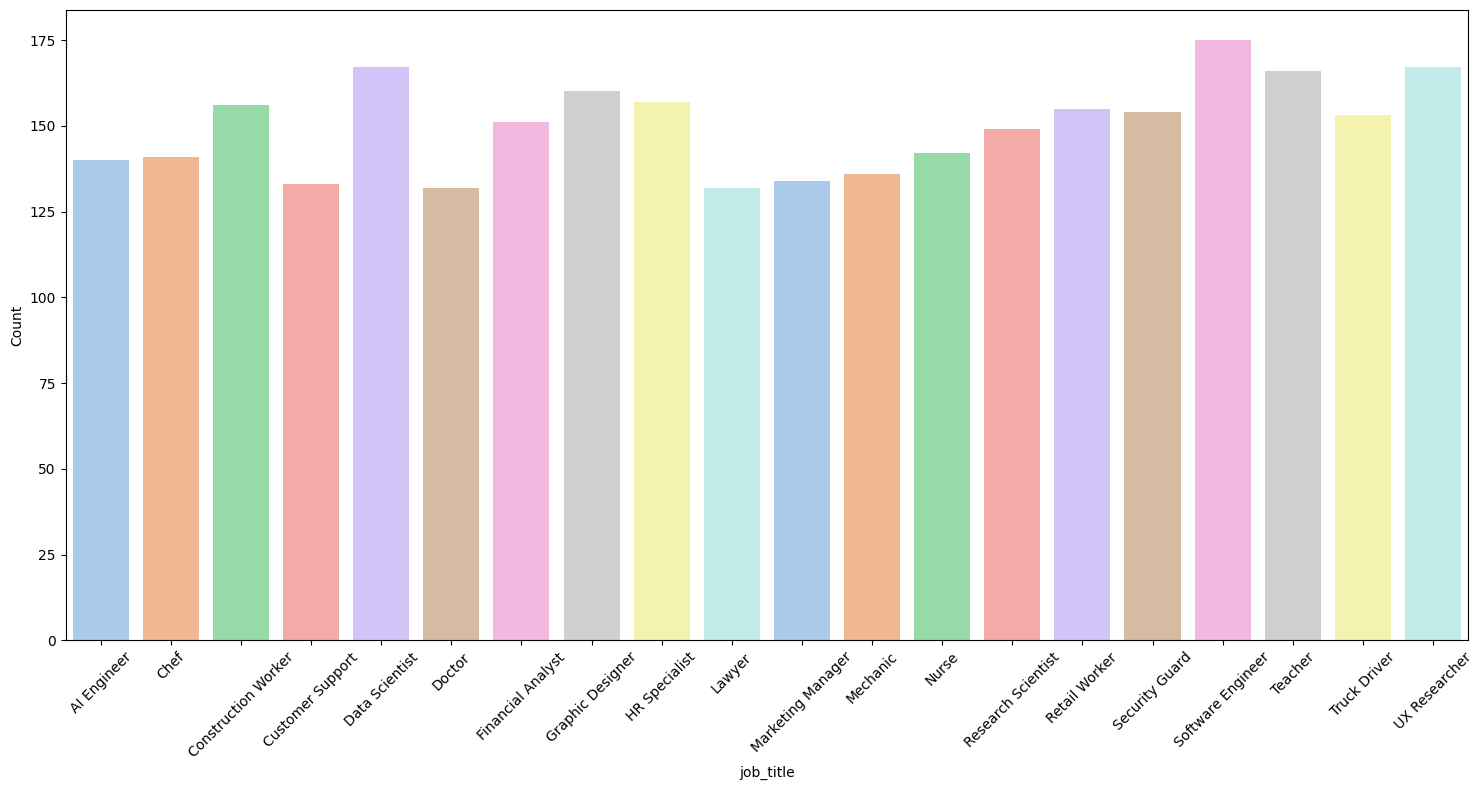

/tmp/ipykernel_17/2723593099.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].cat.categories, palette='pastel')


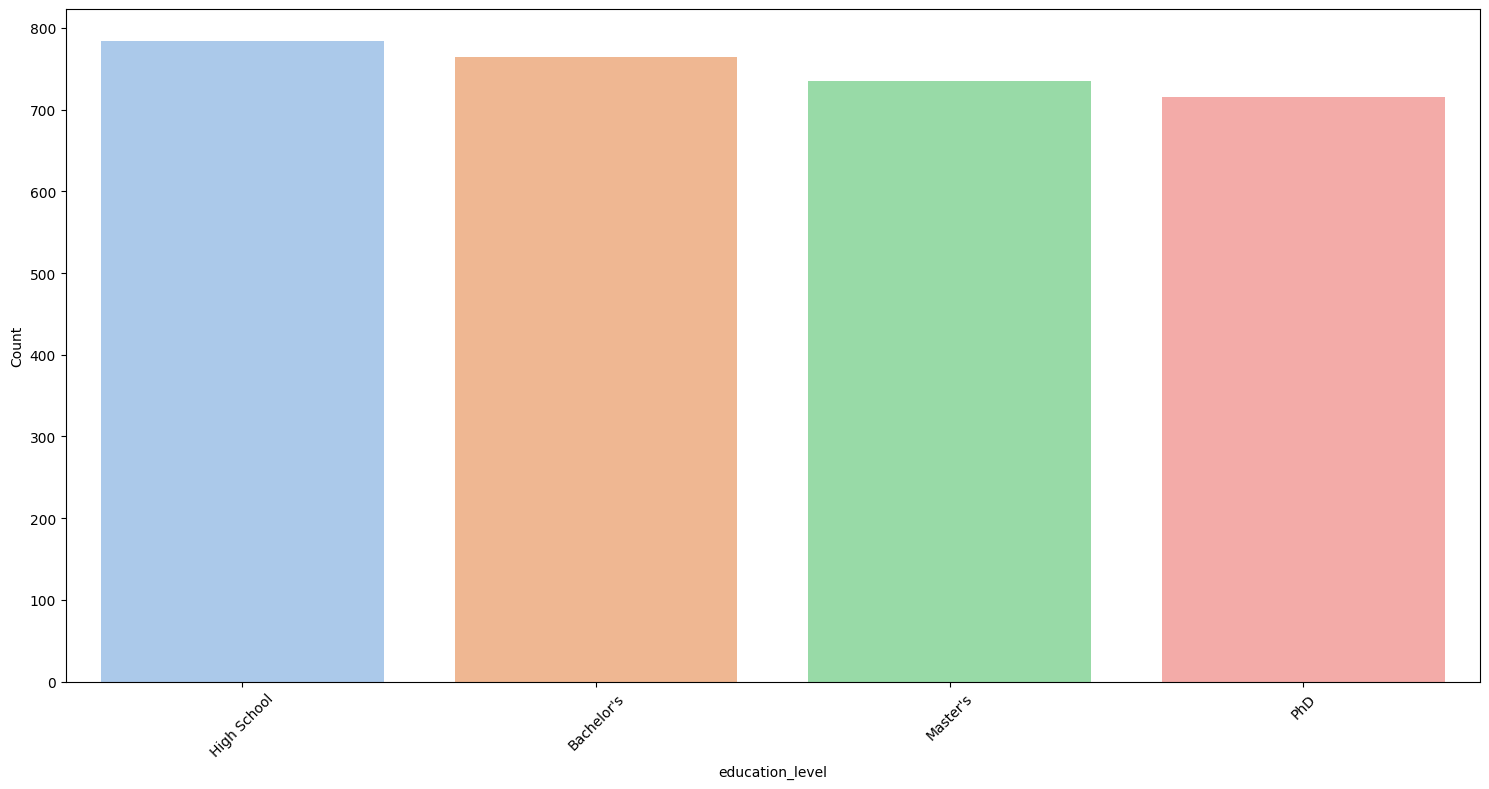

/tmp/ipykernel_17/2723593099.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].cat.categories, palette='pastel')


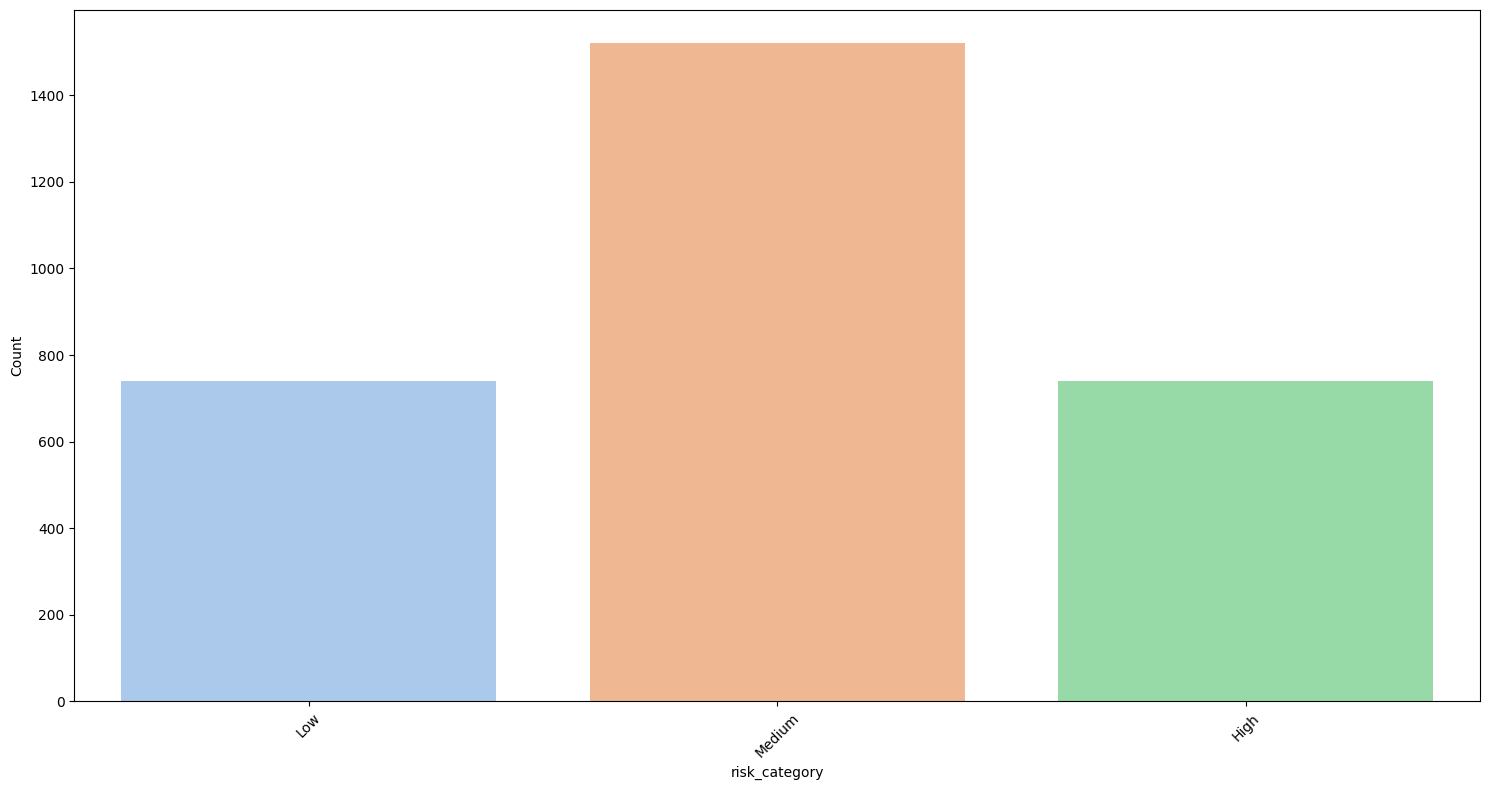

In [10]:
categorical_cols = df.select_dtypes(include='category').columns

for col in categorical_cols:
    plt.figure(figsize=(15,8))
    sns.countplot(x=col, data=df, order=df[col].cat.categories, palette='pastel')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

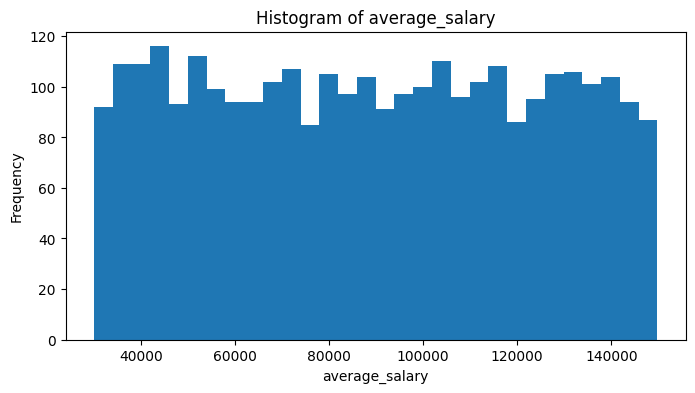

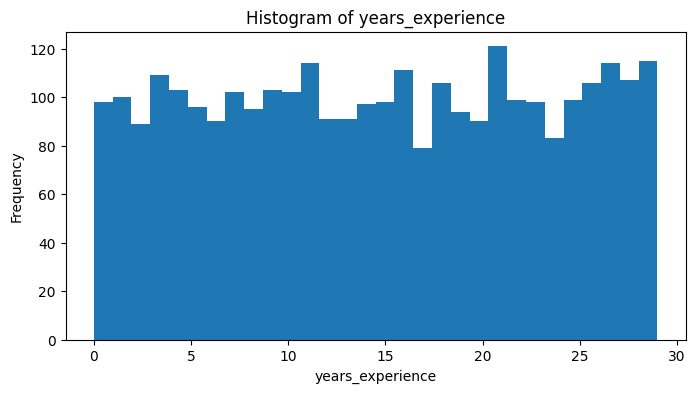

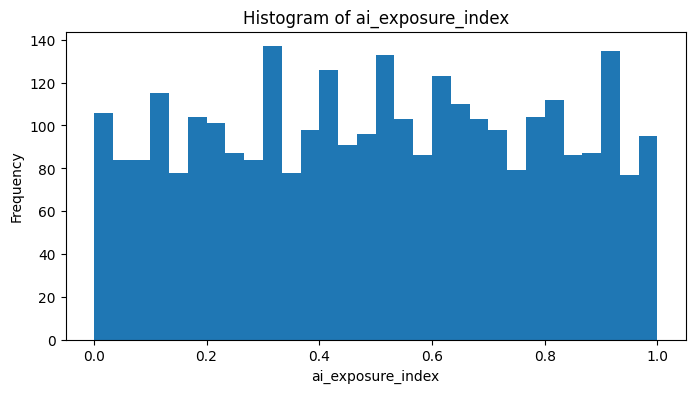

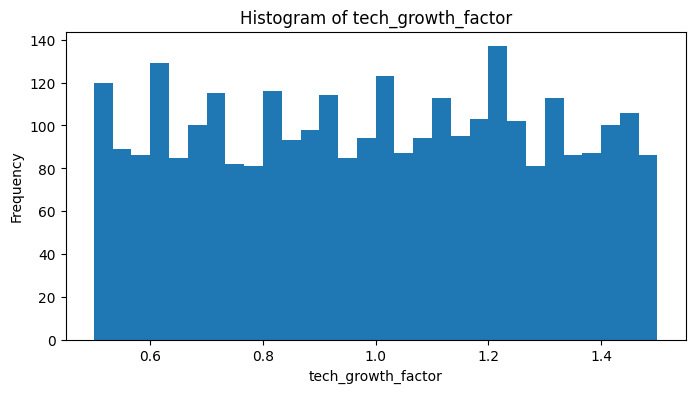

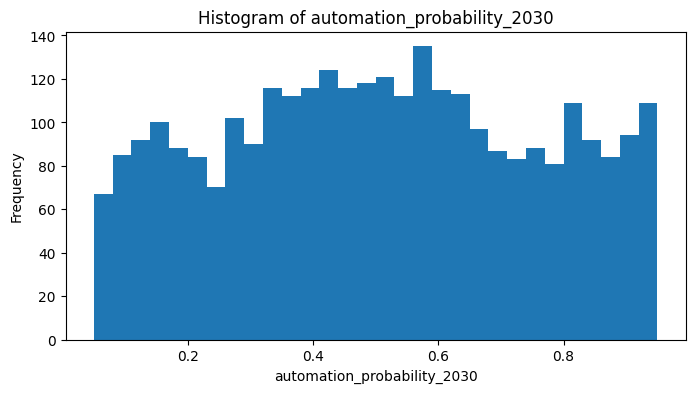

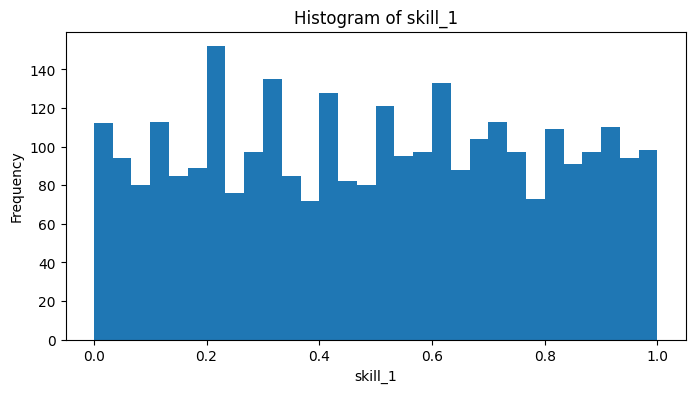

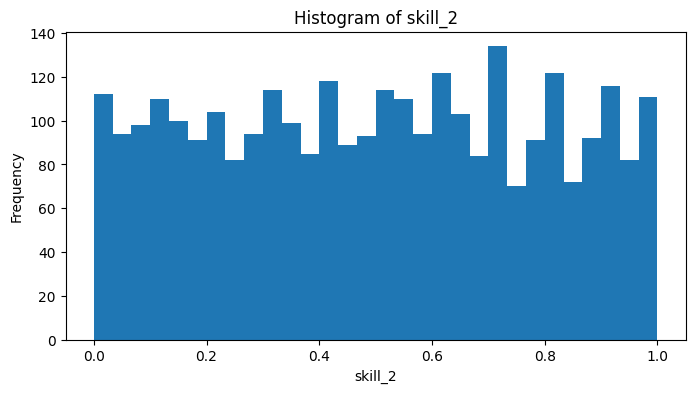

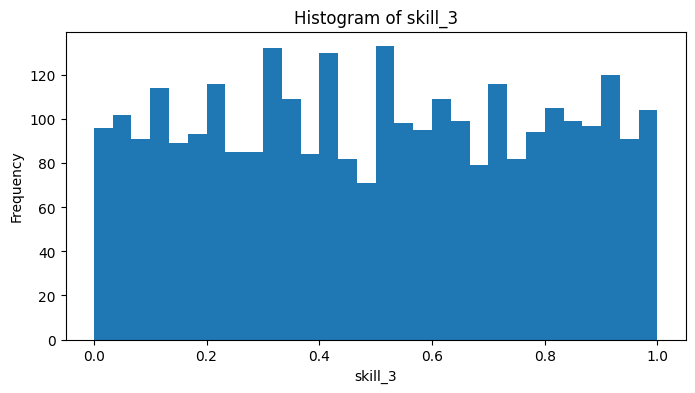

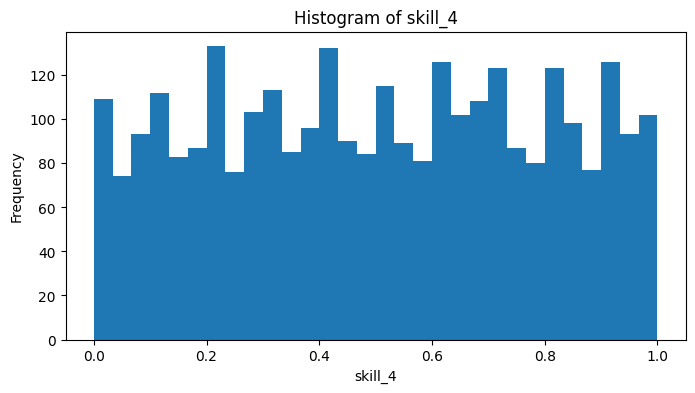

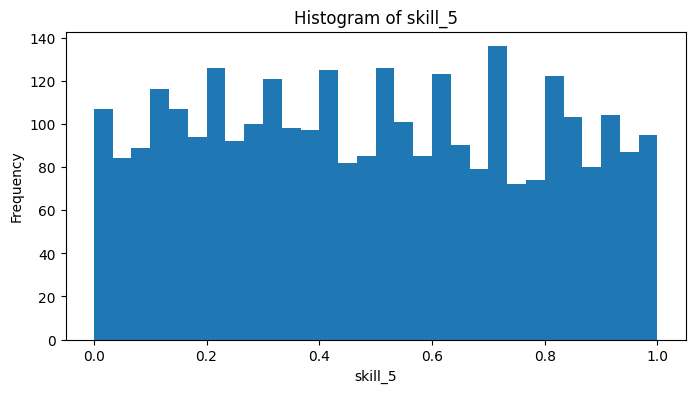

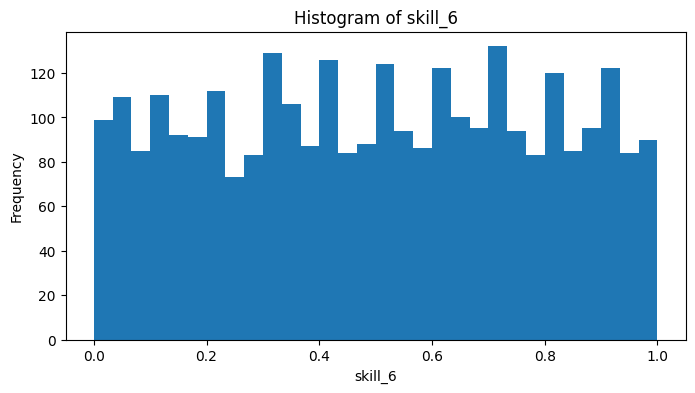

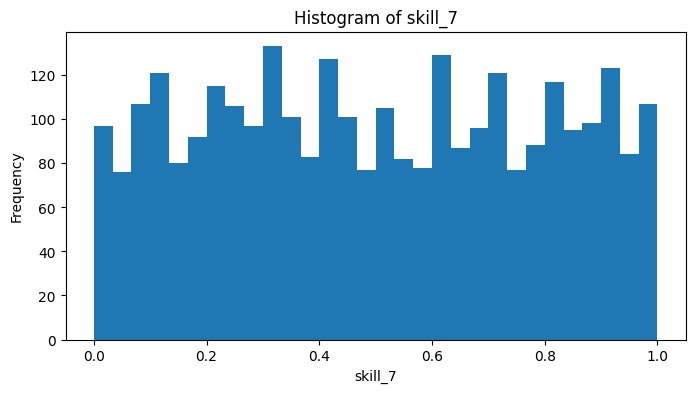

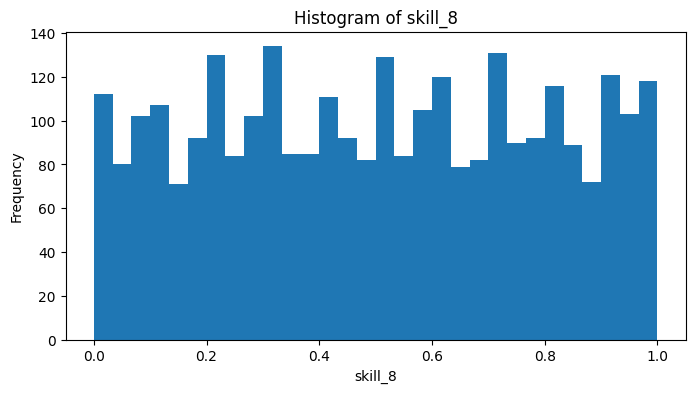

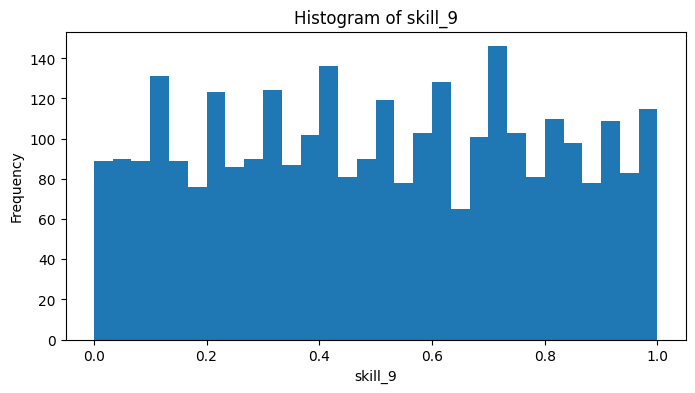

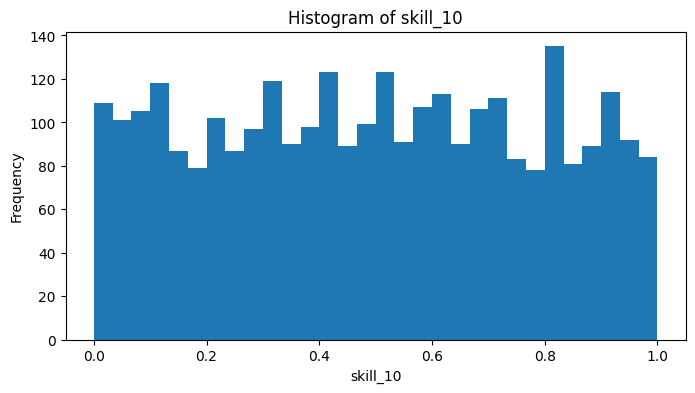

In [11]:
cols = df.select_dtypes(include=['int64','float64']).columns

for col in cols:
    plt.figure(figsize=(8,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

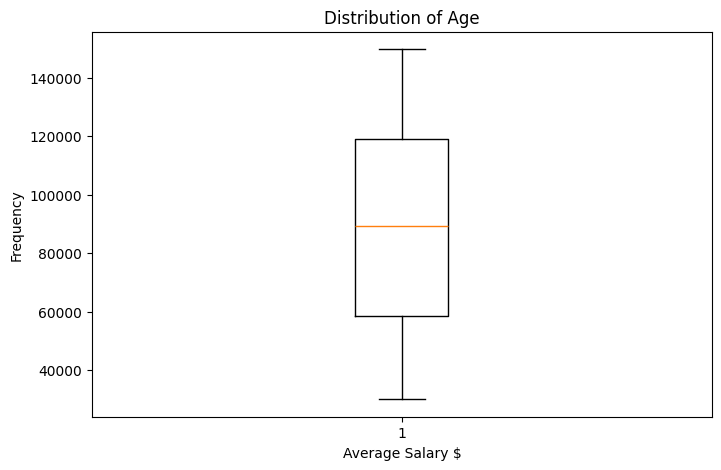

In [12]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['average_salary'])
plt.xlabel('Average Salary $')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [13]:
df.describe()

,average_salary,years_experience,ai_exposure_index,tech_growth_factor,automation_probability_2030,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,skill_7,skill_8,skill_9,skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Groupping by `job_title` and calculaute the average of the `average_salary`. We will get an idea based of how much does each title earn on average keeping everything else constant.

In [14]:
avg_salary_by_job = (
    df
    .groupby('job_title', as_index=False)['average_salary']
    .mean()
)

avg_salary_by_job

/tmp/ipykernel_17/3666962071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('job_title', as_index=False)['average_salary']


,job_title,average_salary
0,AI Engineer,90759.828571
1,Chef,91407.801418
2,Construction Worker,90800.333333
3,Customer Support,87487.000000
4,Data Scientist,90629.550898
5,Doctor,89091.742424
6,Financial Analyst,88030.311258
7,Graphic Designer,96423.468750
8,HR Specialist,89242.254777
9,Lawyer,92441.878788


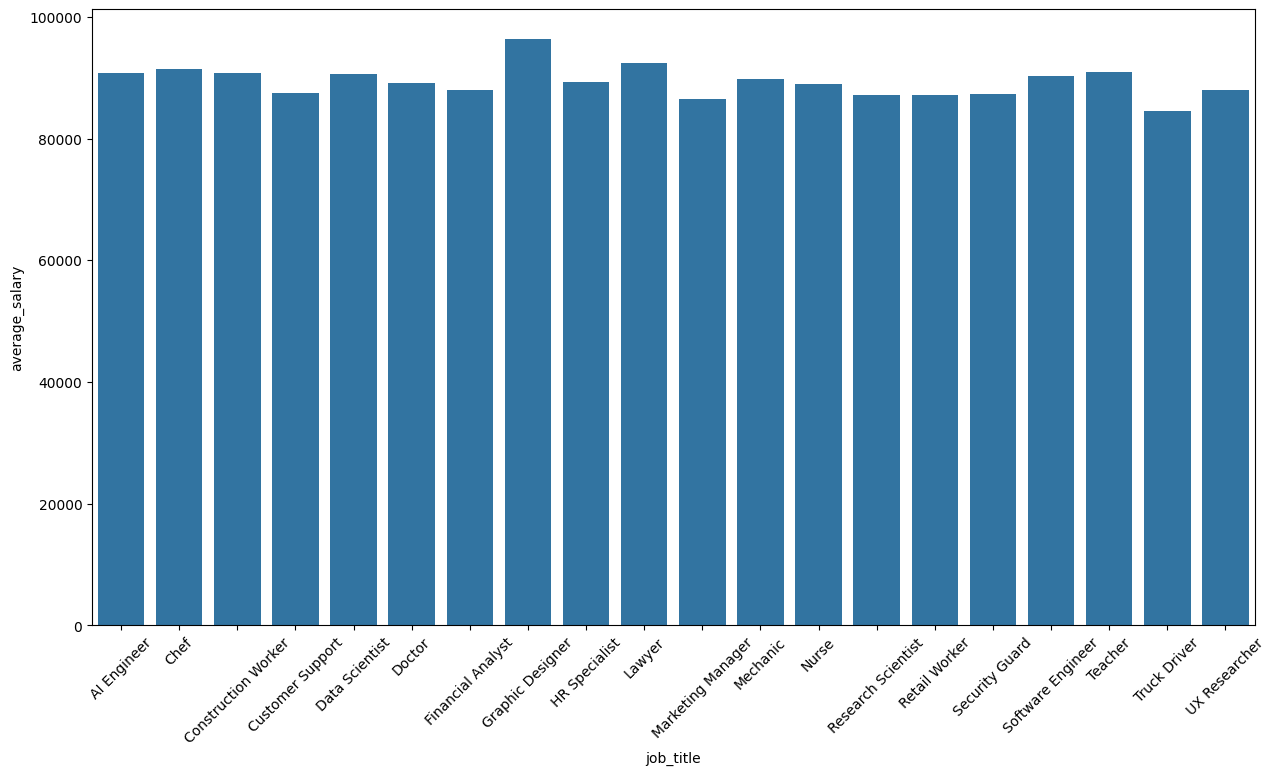

In [15]:
plt.figure(figsize=(15,8))

sns.barplot(
    data=avg_salary_by_job,
    x='job_title',
    y='average_salary'
)

plt.xticks(rotation=45);

## Data modeling

### We will Make a Linear Regression model to predict average salary.

### First we will create a column `log_avg_salary` where we will take the log of averege_salary

In [16]:
df['log_avg_salary'] = np.log(df['average_salary'])
df['log_years_experience'] = np.log(df['years_experience'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
df

,job_title,average_salary,years_experience,education_level,ai_exposure_index,tech_growth_factor,automation_probability_2030,risk_category,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,skill_7,skill_8,skill_9,skill_10,log_avg_salary,log_years_experience
1,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00,10.731930,3.332205
2,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98,11.800770,2.995732
3,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83,11.892840,0.693147
4,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33,11.824300,2.564949
5,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42,11.161906,3.091042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,Doctor,111319,6,Bachelor's,0.24,1.18,0.20,Low,0.73,0.37,0.99,0.07,0.08,0.92,0.65,0.33,0.76,0.45,11.620155,1.791759
2997,UX Researcher,44363,29,PhD,0.65,0.74,0.35,Medium,0.23,0.48,0.05,0.88,0.56,0.29,0.69,0.80,0.61,0.20,10.700161,3.367296
2998,Data Scientist,61325,23,Master's,0.64,0.94,0.39,Medium,0.28,0.62,0.73,0.21,0.96,0.01,0.70,0.29,0.48,0.57,11.023943,3.135494
2999,Graphic Designer,110296,7,PhD,0.95,1.23,0.46,Medium,0.21,0.18,0.14,0.22,0.55,0.68,0.31,0.55,0.34,0.70,11.610923,1.945910


In [18]:
cols = list(df.columns)

cols.remove('log_avg_salary')
cols.remove('log_years_experience')
idx = cols.index('average_salary') + 1
cols.insert(idx, 'log_avg_salary')
idx2 = cols.index('years_experience') + 1
cols.insert(idx2, 'log_years_experience')


df = df[cols]

In [19]:
df

,job_title,average_salary,log_avg_salary,years_experience,log_years_experience,education_level,ai_exposure_index,tech_growth_factor,automation_probability_2030,risk_category,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,skill_7,skill_8,skill_9,skill_10
1,Security Guard,45795,10.731930,28,3.332205,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
2,Research Scientist,133355,11.800770,20,2.995732,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
3,Construction Worker,146216,11.892840,2,0.693147,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
4,Software Engineer,136530,11.824300,13,2.564949,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
5,Financial Analyst,70397,11.161906,22,3.091042,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,Doctor,111319,11.620155,6,1.791759,Bachelor's,0.24,1.18,0.20,Low,0.73,0.37,0.99,0.07,0.08,0.92,0.65,0.33,0.76,0.45
2997,UX Researcher,44363,10.700161,29,3.367296,PhD,0.65,0.74,0.35,Medium,0.23,0.48,0.05,0.88,0.56,0.29,0.69,0.80,0.61,0.20
2998,Data Scientist,61325,11.023943,23,3.135494,Master's,0.64,0.94,0.39,Medium,0.28,0.62,0.73,0.21,0.96,0.01,0.70,0.29,0.48,0.57
2999,Graphic Designer,110296,11.610923,7,1.945910,PhD,0.95,1.23,0.46,Medium,0.21,0.18,0.14,0.22,0.55,0.68,0.31,0.55,0.34,0.70


In [20]:
cols

['job_title',
 'average_salary',
 'log_avg_salary',
 'years_experience',
 'log_years_experience',
 'education_level',
 'ai_exposure_index',
 'tech_growth_factor',
 'automation_probability_2030',
 'risk_category',
 'skill_1',
 'skill_2',
 'skill_3',
 'skill_4',
 'skill_5',
 'skill_6',
 'skill_7',
 'skill_8',
 'skill_9',
 'skill_10']

In [21]:
X = df.drop(columns=['log_avg_salary', 'average_salary'])
y = df['log_avg_salary']

In [22]:
numeric_features = [
    'years_experience',
    'ai_exposure_index',
    'tech_growth_factor',
    'automation_probability_2030',
    'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5',
    'skill_6', 'skill_7', 'skill_8', 'skill_9', 'skill_10'
]

categorical_features = [
    'job_title',
    'education_level',
    'risk_category'
]

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),
         categorical_features)
    ]
)

In [24]:
preprocessor

ColumnTransformer(transformers=[('num', 'passthrough',
                                 ['years_experience', 'ai_exposure_index',
                                  'tech_growth_factor',
                                  'automation_probability_2030', 'skill_1',
                                  'skill_2', 'skill_3', 'skill_4', 'skill_5',
                                  'skill_6', 'skill_7', 'skill_8', 'skill_9',
                                  'skill_10']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['job_title', 'education_level',
                                  'risk_category'])])

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['years_experience',
                                                   'ai_exposure_index',
                                                   'tech_growth_factor',
                                                   'automation_probability_2030',
                                                   'skill_1', 'skill_2',
                                                   'skill_3', 'skill_4',
                                                   'skill_5', 'skill_6',
                                                   'skill_7', 'skill_8',
                                                   'skill_9', 'skill_10']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job_title',
                                                   'education_level',
                                                   'risk_category'])])),
                ('regressor', LinearRegression())])

In [27]:
feature_names = (
    numeric_features +
    list(
        model.named_steps['preprocessor']
        .named_transformers_['cat']
        .get_feature_names_out(categorical_features)
    )
)

coefficients = pd.DataFrame({
    'feature': feature_names,
    'coefficient': model.named_steps['regressor'].coef_
}).sort_values(by='coefficient', ascending=False)

coefficients

,feature,coefficient
37,risk_category_Medium,0.133667
3,automation_probability_2030,0.064244
13,skill_10,0.062611
34,education_level_Master's,0.032649
10,skill_7,0.006583
6,skill_3,0.004669
11,skill_8,0.002931
2,tech_growth_factor,0.002222
0,years_experience,0.000746
35,education_level_PhD,-0.001764


In [28]:
model.named_steps['regressor'].intercept_


np.float64(11.604765830542435)



\[
\begin{align*}
\log(\text{avg\_salary}) = & \ 11.60477 \\
& + 0.00075 \cdot \text{years\_experience} \\
& - 0.03772 \cdot \text{ai\_exposure\_index} \\
& + 0.00222 \cdot \text{tech\_growth\_factor} \\
& + 0.06424 \cdot \text{automation\_probability\_2030} \\
& + 0.00467 \cdot \text{skill\_3} \\
& + 0.00658 \cdot \text{skill\_7} \\
& + 0.00293 \cdot \text{skill\_8} \\
& - 0.01006 \cdot \text{skill\_5} \\
& - 0.02098 \cdot \text{skill\_9} \\
& - 0.02579 \cdot \text{skill\_2} \\
& - 0.03285 \cdot \text{skill\_6} \\
& - 0.03838 \cdot \text{skill\_1} \\
& - 0.04322 \cdot \text{skill\_4} \\
& + 0.06261 \cdot \text{skill\_10} \\
& + 0.13367 \cdot \text{risk\_category\_Medium} \\
& - 0.20511 \cdot \text{risk\_category\_Low} \\
& + 0.03265 \cdot \text{education\_level\_Master’s} \\
& - 0.00176 \cdot \text{education\_level\_PhD} \\
& - 0.00477 \cdot \text{education\_level\_High School} \\
& - 0.03289 \cdot \text{job\_title\_Teacher} \\
& - 0.03427 \cdot \text{job\_title\_Doctor} \\
& - 0.05729 \cdot \text{job\_title\_Research Scientist} \\
& - 0.09686 \cdot \text{job\_title\_Nurse} \\
& - 0.24842 \cdot \text{job\_title\_Construction Worker} \\
& - 0.33371 \cdot \text{job\_title\_Retail Worker} \\
& - 0.34571 \cdot \text{job\_title\_Security Guard} \\
& - 0.34588 \cdot \text{job\_title\_Customer Support} \\
& - 0.35214 \cdot \text{job\_title\_Graphic Designer} \\
& - 0.35837 \cdot \text{job\_title\_Truck Driver} \\
& - 0.36046 \cdot \text{job\_title\_Lawyer} \\
& - 0.39367 \cdot \text{job\_title\_Financial Analyst} \\
& - 0.39534 \cdot \text{job\_title\_Data Scientist} \\
& - 0.39686 \cdot \text{job\_title\_Chef} \\
& - 0.40894 \cdot \text{job\_title\_Mechanic} \\
& - 0.41001 \cdot \text{job\_title\_HR Specialist} \\
& - 0.41092 \cdot \text{job\_title\_Software Engineer} \\
& - 0.41295 \cdot \text{job\_title\_UX Researcher} \\
& - 0.46591 \cdot \text{job\_title\_Marketing Manager}
\end{align*}
\]


In [29]:
import statsmodels.api as sm
import pandas as pd

# Transform features
X_processed = model.named_steps['preprocessor'].transform(X)

# Get feature names
feature_names = (
    numeric_features +
    list(
        model.named_steps['preprocessor']
        .named_transformers_['cat']
        .get_feature_names_out(categorical_features)
    )
)

# Convert to DataFrame and reset index to match y
X_processed_df = pd.DataFrame(X_processed, columns=feature_names, index=y.index)

# Add intercept
X_processed_df = sm.add_constant(X_processed_df)

# Fit OLS with statsmodels
ols_model = sm.OLS(y, X_processed_df).fit()

# Significance stars function
def significance_stars(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    elif p < 0.1:
        return '.'
    else:
        return ''

# Create summary table
summary_df = ols_model.summary2().tables[1]
summary_df['stars'] = summary_df['P>|t|'].apply(significance_stars)

# Rename columns for readability
summary_df = summary_df.rename(columns={
    'Coef.': 'coef',
    'Std.Err.': 'std_err',
    't': 't_value',
    'P>|t|': 'p_value'
})

summary_df


,coef,std_err,t_value,p_value,[0.025,0.975],stars
const,11.450882,0.208382,54.951354,0.000000,11.042294,11.859471,***
years_experience,0.000880,0.000919,0.957578,0.338354,-0.000922,0.002683,
ai_exposure_index,-0.043239,0.028240,-1.531101,0.125851,-0.098612,0.012134,
tech_growth_factor,-0.007656,0.027958,-0.273850,0.784219,-0.062474,0.047162,
automation_probability_2030,0.068482,0.086372,0.792871,0.427917,-0.100873,0.237837,
skill_1,-0.026628,0.027907,-0.954178,0.340071,-0.081346,0.028091,
skill_2,-0.022605,0.027866,-0.811224,0.417302,-0.077243,0.032033,
skill_3,0.021548,0.027864,0.773312,0.439400,-0.033088,0.076184,
skill_4,-0.042698,0.027964,-1.526888,0.126896,-0.097530,0.012133,
skill_5,-0.016484,0.028188,-0.584788,0.558735,-0.071753,0.038786,


## Testing the model on testing (unseen) data

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict log salaries on the test set
y_pred = model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


Test RMSE: 0.4432
Test R²: -0.0077


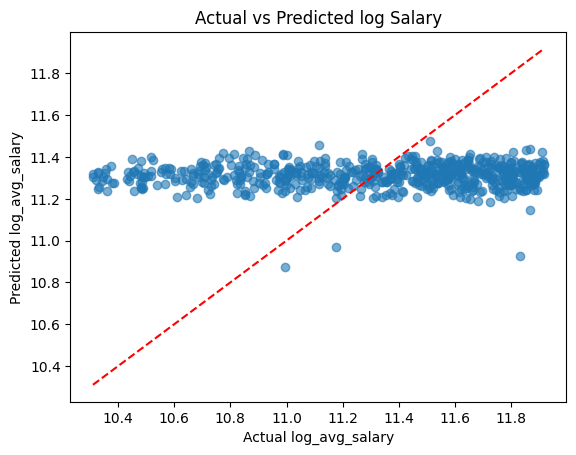

In [31]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual log_avg_salary")
plt.ylabel("Predicted log_avg_salary")
plt.title("Actual vs Predicted log Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


The model performs horribly bad. It is clearly overfitting.

**Key Takeaways**

Job title was a strong predictor in Model 1, but including it caused overfitting.

Model 2 generalizes slightly better, but R² is still essentially 0.

Linear regression may be too simple for this dataset:

Likely non-linear relationships or interactions between experience, skills, and job type.

Tree-based models like Random Forests or Gradient Boosting could improve predictive power significantly.